![Green%20Minimalist%20Organic%20Notion%20Header%20%282%29%20(1).jpg](attachment:Green%20Minimalist%20Organic%20Notion%20Header%20%282%29%20(1).jpg)
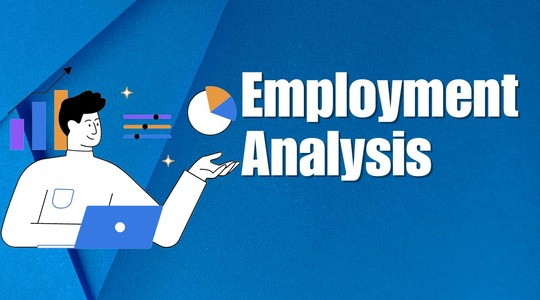

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
d1=pd.read_csv(r"C:\Users\ADMIN\Desktop\Oasis\Unemployment in India.csv")
d1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


# Data Preprocessing

### Five point summary

In [4]:
d1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [5]:
d1.describe(include='O')

,Region,Date,Frequency,Area
count,740,740,740,740
unique,28,14,2,2
top,Andhra Pradesh,31-10-2019,Monthly,Urban
freq,28,55,381,381


### Null values treatment

In [6]:
d1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

From the above,we can tell that there are null values in the dataset

In [7]:
d1[' Date'].fillna(d1[' Date'].mode()[0],inplace=True)

In [10]:
d1['Area'].unique()

array(['Rural', nan, 'Urban'], dtype=object)

In [15]:
d1['Area'].fillna(d1['Area'].mode()[0],inplace=True)

In [17]:
d1[' Frequency'].fillna(d1[' Frequency'].mode()[0],inplace=True)

In [18]:
d1[' Estimated Employed'].fillna(d1[' Estimated Employed'].median(),inplace=True)

In [19]:
d1[' Estimated Labour Participation Rate (%)'].fillna(d1[' Estimated Labour Participation Rate (%)'].mean(),inplace=True)

In [20]:
d1[' Estimated Unemployment Rate (%)'].fillna(d1[' Estimated Unemployment Rate (%)'].mean(),inplace=True)

In [21]:
d1['Region'].fillna(d1['Region'].mode()[0],inplace=True)

In [22]:
d1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

### Outlier Treatment

In [23]:
q1=d1.quantile(0.25)
q3=d1.quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
d2=d1[~(((d1>ul)|(d1<ll)).any(axis=1))]

In [24]:
d2.shape

(653, 7)

In [25]:
d1.shape


(768, 7)

Here there are some outliers so i am removing it and taking d2 as my new dataframe

### Skewnwss

In [26]:
d2.skew()

 Estimated Unemployment Rate (%)            0.840920
 Estimated Employed                         1.089155
 Estimated Labour Participation Rate (%)    0.241818
dtype: float64

there are slight skewness in the data

# Data Visualisation

### Univariant Analysis

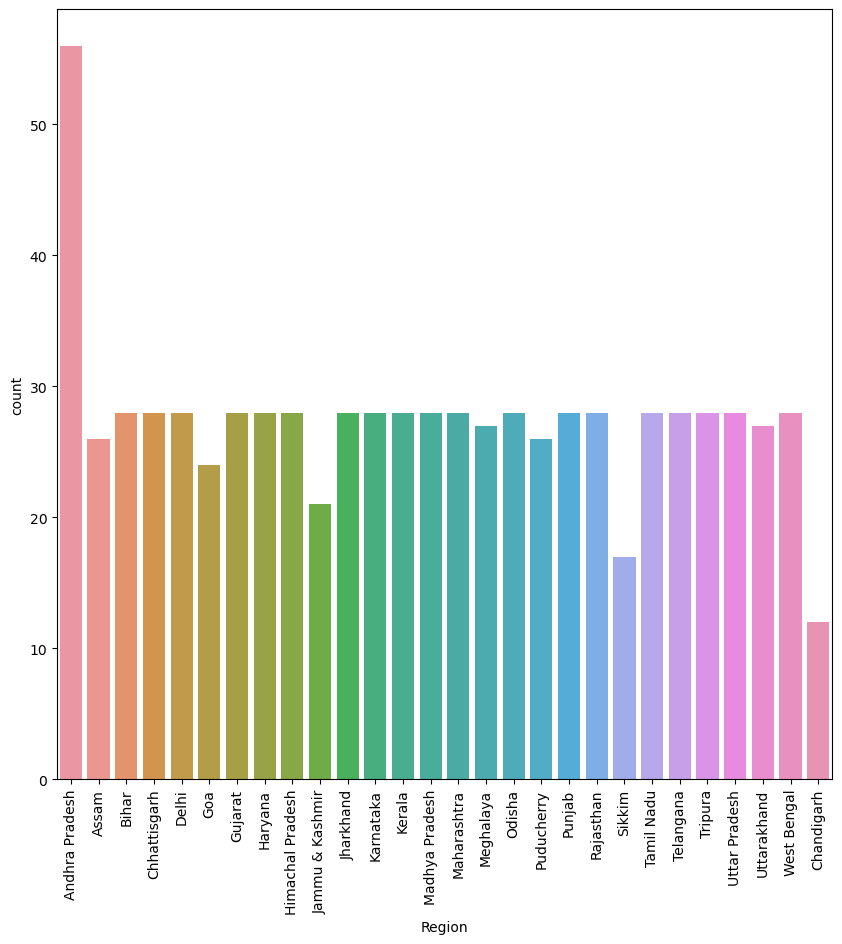

In [30]:
plt.figure(figsize=[10,10])
sns.countplot(x=d1['Region'])
plt.xticks(rotation=90)
plt.show()

from the above plot we can tell that Andhra pradesh has the highest unemployment count

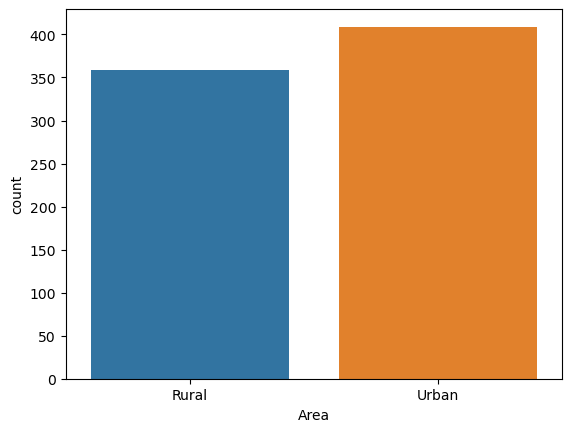

In [32]:
sns.countplot(x=d1['Area'])
plt.show()

Urban area has the more unemployment then the rural region

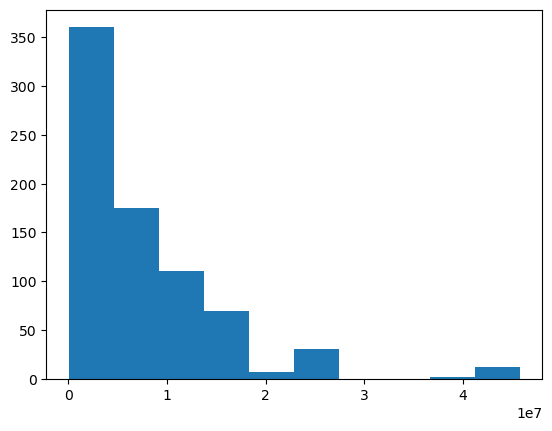

In [33]:
plt.hist(d1[' Estimated Employed'])
plt.show()

the distribution of unemployment rate is slightly right skewed

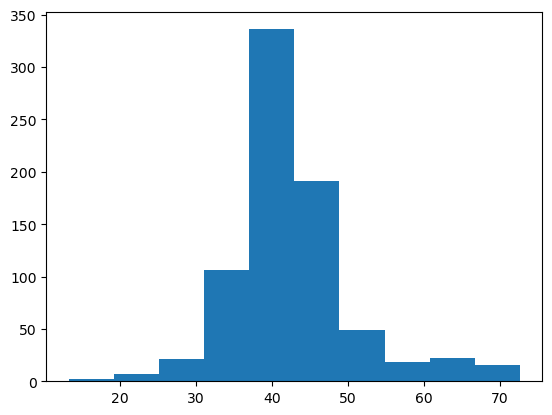

In [34]:
plt.hist(d1[' Estimated Labour Participation Rate (%)'])
plt.show()

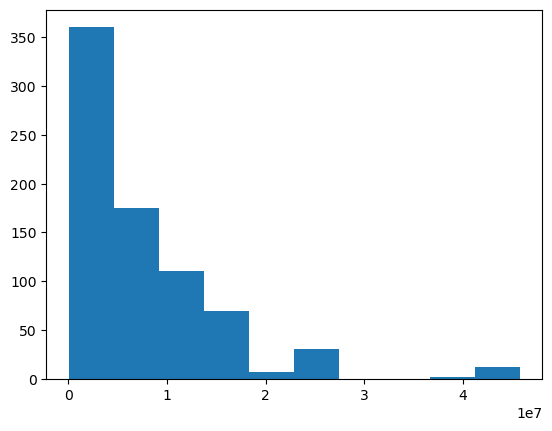

In [35]:
plt.hist(d1[' Estimated Employed'])
plt.show()

### Bivariant Analysis

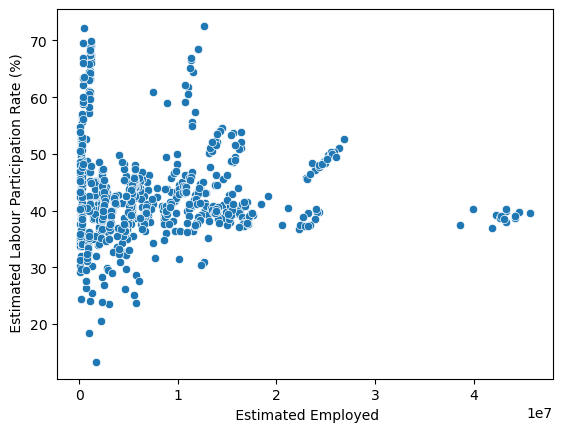

In [36]:
sns.scatterplot(x=d1[' Estimated Employed'],y=d1[' Estimated Labour Participation Rate (%)'])
plt.show()

In [ ]:
there is no relation between estimated employed and estimated labour participation rate

<Axes: xlabel='Area', ylabel=' Estimated Employed'>

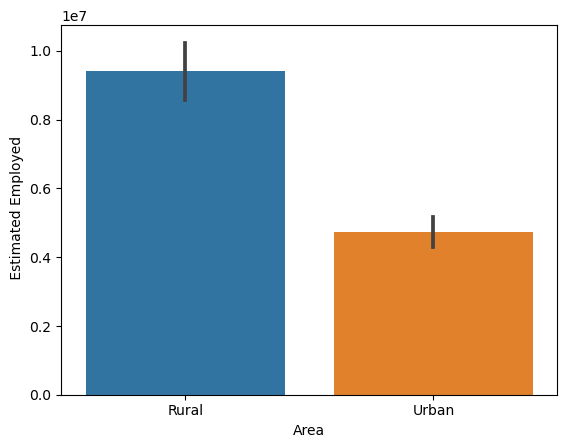

In [37]:
sns.barplot(x=d2['Area'],y=d1[' Estimated Employed'])

Rural region has more estimated employed rate

<Axes: xlabel='Area', ylabel=' Estimated Unemployment Rate (%)'>

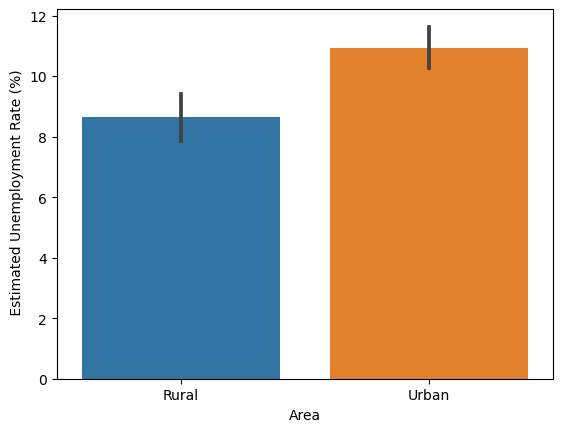

In [38]:
sns.barplot(x=d2['Area'],y=d1[' Estimated Unemployment Rate (%)'])

In [ ]:
Estmated unemployed rate is higher in urban area

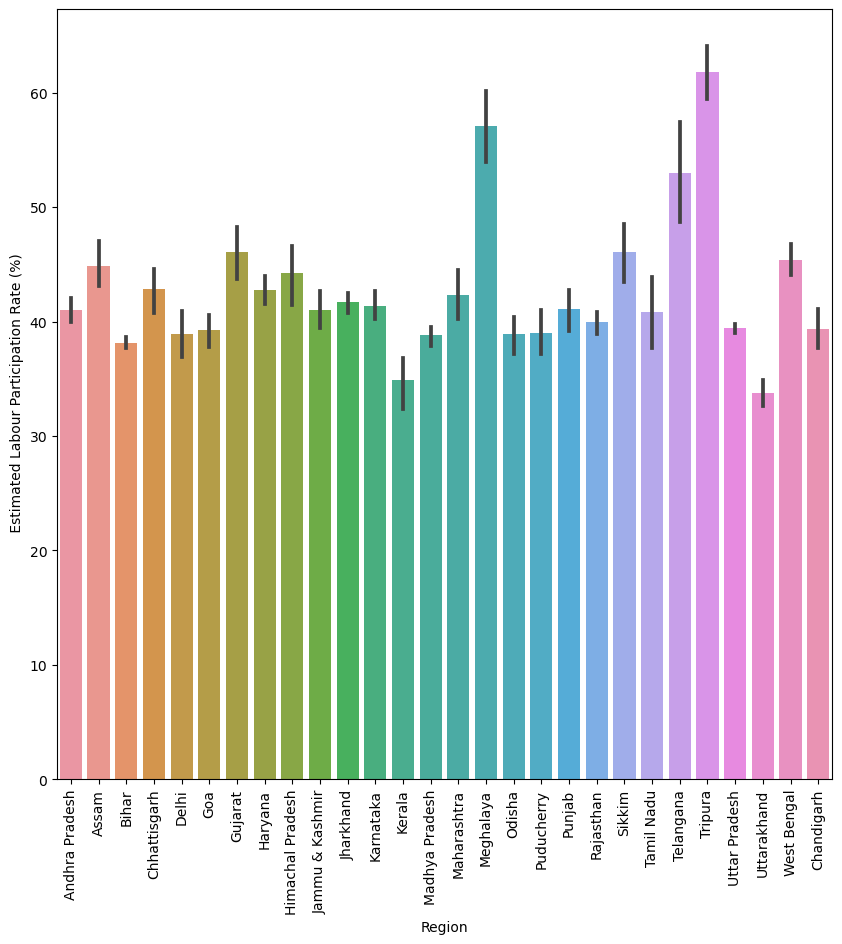

In [40]:
plt.figure(figsize=[10,10])
sns.barplot(x=d1['Region'],y=d1[' Estimated Labour Participation Rate (%)'])
plt.xticks(rotation=90)
plt.show()

Tirupura region has the highest employment participation rate

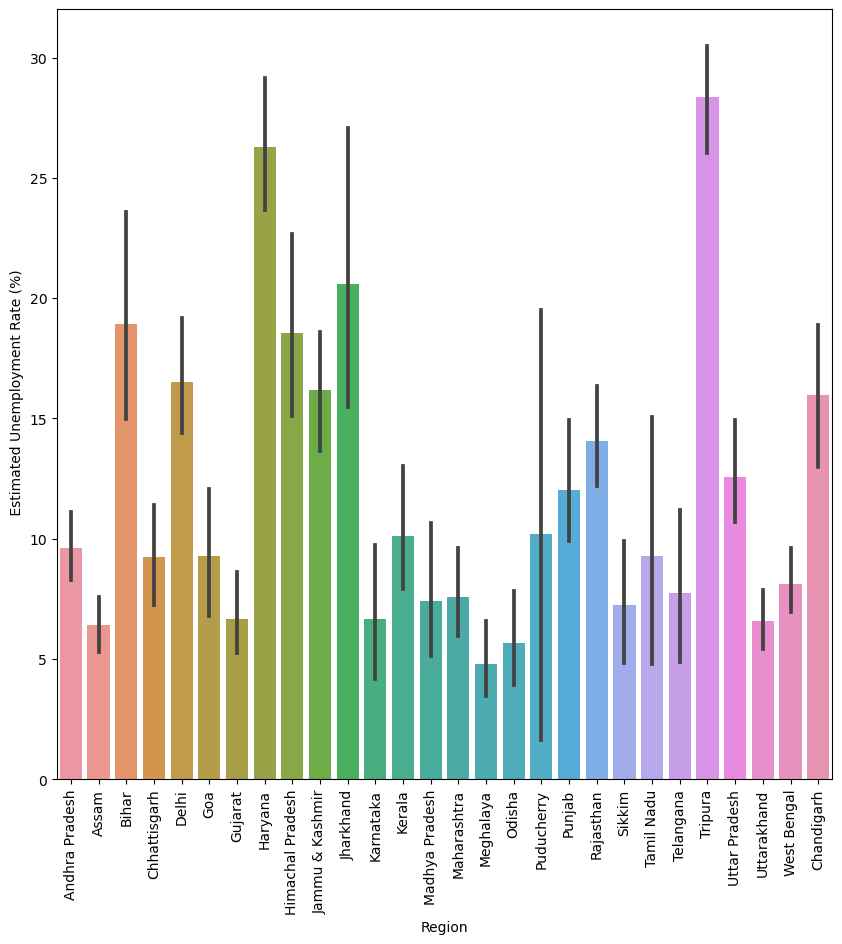

In [41]:
plt.figure(figsize=[10,10])
sns.barplot(x=d1['Region'],y=d1[' Estimated Unemployment Rate (%)'])
plt.xticks(rotation=90)
plt.show()

eventhough tripura has the highest employment articipation rate it also has the highest unemployment 

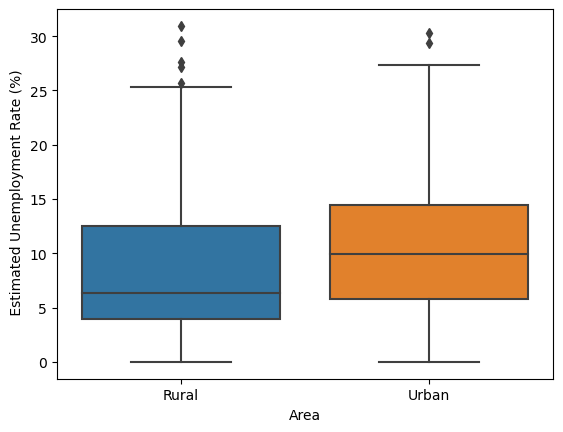

In [42]:
sns.boxplot(x=d2['Area'],y=d2[' Estimated Unemployment Rate (%)'])
plt.show()

from the above plot we can tell that unemployment is more in urban areas

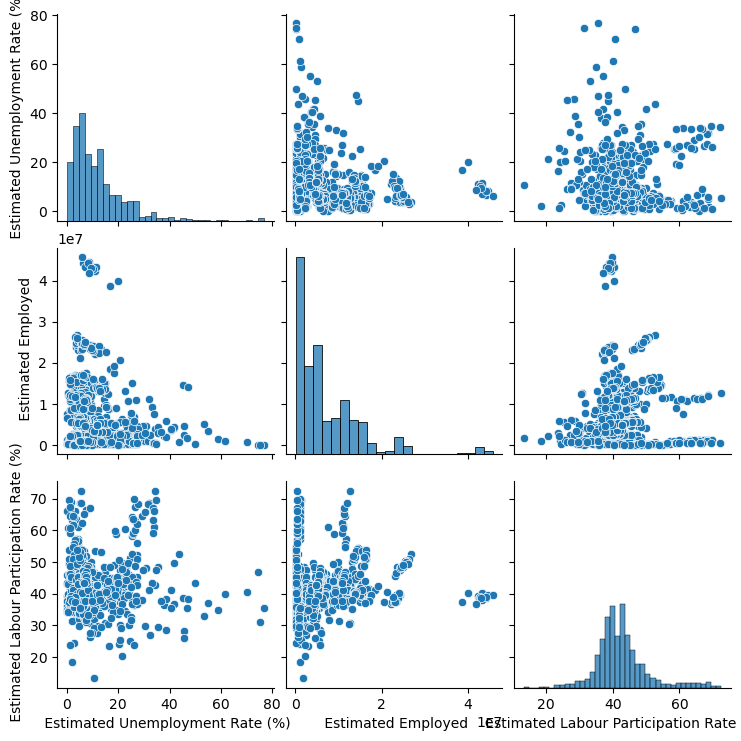

In [43]:
sns.pairplot(d1)

### multivariant analysis

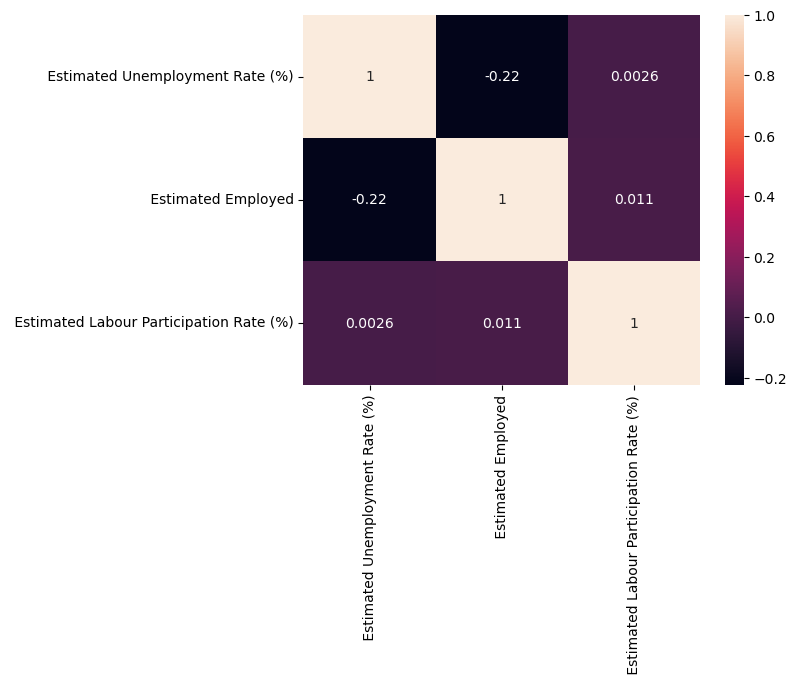

In [44]:
sns.heatmap(d1.corr(),annot=True)
plt.show()

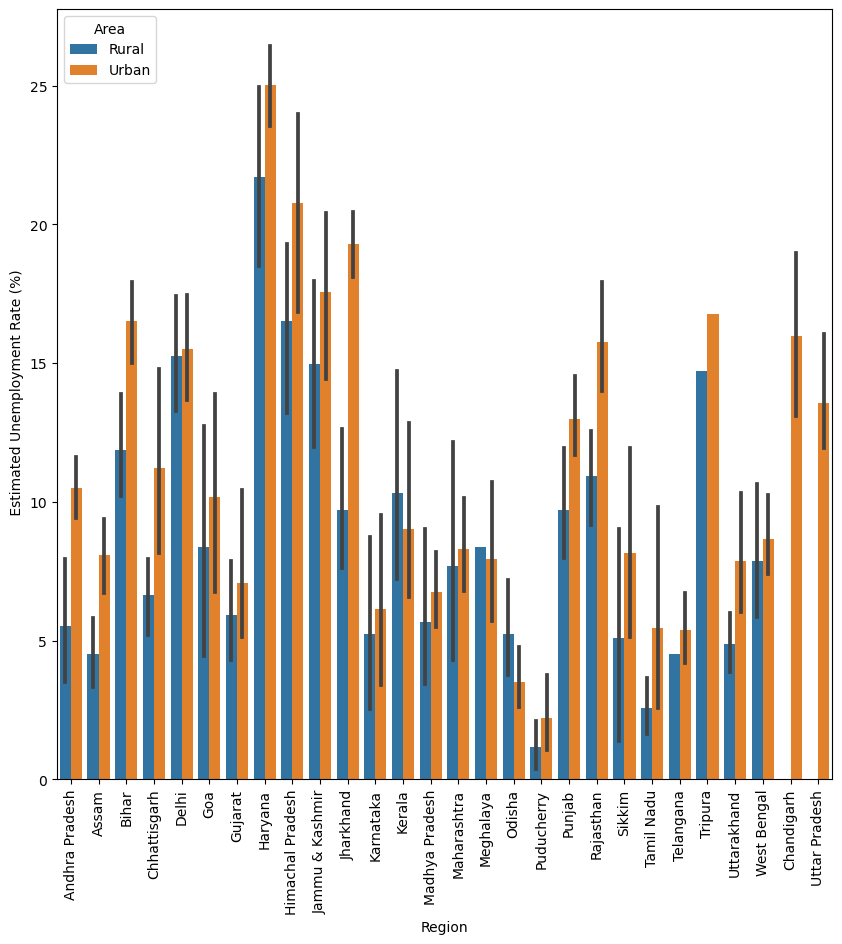

In [48]:
plt.figure(figsize=[10,10])
sns.barplot(x=d2['Region'],y=d2[' Estimated Unemployment Rate (%)'],hue=d2['Area'])
plt.xticks(rotation=90)
plt.show()

from the above plot we can tell that the unemployment rate is more in urban areas in all region 
Haryana is has the highest unemployment comapred to other regions